In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import HTML

halfsize_figure = (8,3)
fullsize_figure = (16,3)

#Default figure size is smaller figure
plt.rcParams.update({'font.size': 12, 'figure.figsize': fullsize_figure})

stepsize = 1e-5

In [16]:
def r(t):
    if t > 0:
        return t
    return 0

def u(t):
    if t >= 0:
        return 1
    return 0

<h1>Introduction</h1>
<p>In this lab, we examine the step and impulse responses of a circuit. The circuit we will analyze is shown in Figure 1.</p>

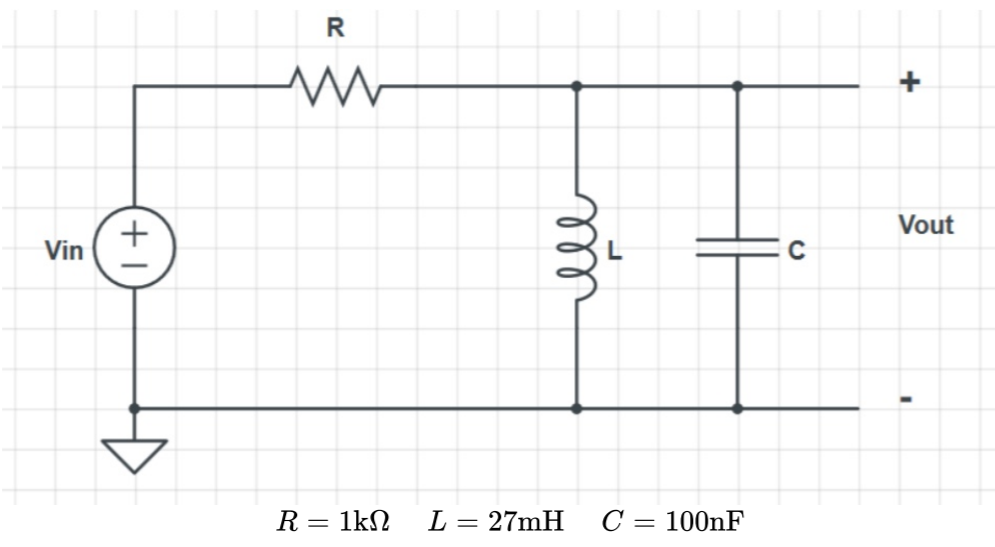

<p>We will calculate the transfer function and use this to find the impulse response and step response of the system.</p>
<h1>Equations</h1>
<h2>Part 1</h2>
<p>The circuit has the following transfer function:</p>
$$ H(s) = \frac{\frac{s}{RC}}{s^2+s\frac{1}{RC}+\frac{1}{LC}} $$
<p>When solved with inverse Laplace transforms, we get the following function:</p>
$$ h(t) = 10356e^{-5000t}\sin(18584t+105^{\circ}) $$
<h2>Part 2</h2>
<p>We will be using the final value theorem on the impulse response to calculate the steady state of the circuit. The final value theorem states the following:</p>
$$\lim_{t\to\infty}f(t)=\lim_{s\to 0}sF(s) $$
<p>To find the step response in the Laplace domain, we simply need to multiply the transfer function by the Laplace domain $u(t)$ equivalent. This is due to the convolution property of the Laplace transform:</p>

$$ \mathscr{L}\{{f(t)*g(t)}\}=F(s)G(s) $$
<p>Which means that the step response in the Laplace domain will simply be:</p>
$$ S(s)=\frac{H(s)}{s} $$
<h1>Procedure &amp; Data</h1>
<h2>Part 1</h2>
<p><b>Goal: </b> Plot the impulse response of a system in two ways, using the hand calculated result, and using the library function <em>scipy.signal.impulse</em></p>
<p>The system we will model is the shown in Figure 1 in the introduction.</p>
<p>Implementing the function in python, we get the code in Listing 1.</p>

In [17]:
def h(t):
    y = np.zeros((len(t),1))
    phase = 105
    p_rad = 105 * np.pi / 180
    for i in range(len(t)):
        y[i] = 10356*np.exp(-5000*t[i])*np.sin(18584*t[i]+p_rad)
    return y


<p>We now compare the plots of this function and the results obtained with <em>scipy.signal.impulse.</em> To plot the impulse response with the library function, we only need to enter the Laplace domain transfer function. The way this is performed is by adding the coefficients of the s terms starting with the highest order term and going down to the 0th order term. The python code for this is shown in listing 2.</p>

In [18]:
#Define the circuit constants
R = 1000
L = 27e-3
C = 100e-9

#This is the laplace transfer function, numerator is first, and denominator is next.
system = ([L,0], [R*L*C, L, R])

#Define the range to plot
t = np.arange(0, 1.2e-3 + stepsize, stepsize)

#Get the resulting transfer function using sig.impulse
(Tr,y2) = sig.impulse(system, T=t)


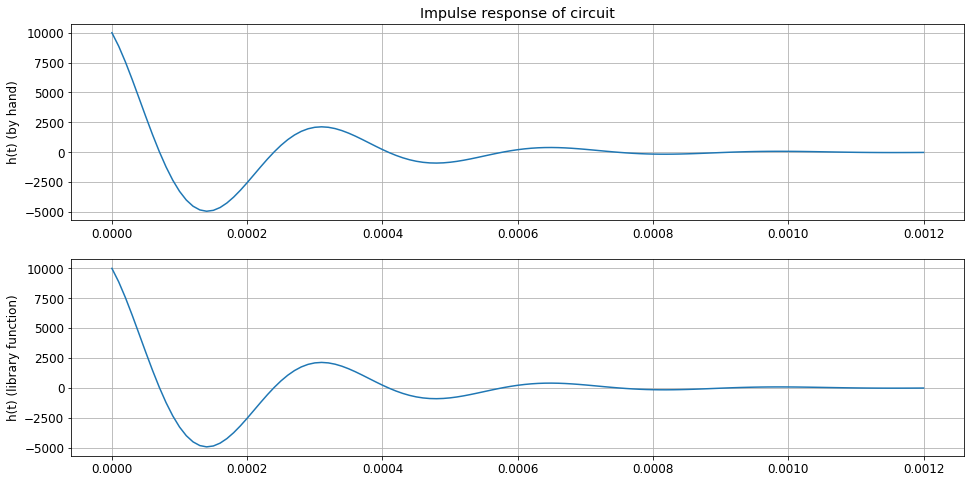

In [19]:
y1 = h(t)

plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=0)

plt.subplot(2,1,1)
plt.plot(t,y1)
plt.grid(True)
plt.ylabel('h(t) (by hand)')
plt.title('Impulse response of circuit')

plt.subplot(2,1,2)
plt.plot(t,y2)
plt.grid(True)
plt.ylabel('h(t) (library function)')
#plt.title('')



plt.show()

<p>As seen, the results are identical.</p>

<h2>Part 2</h2>
<p><em>Goal:</em> To find the step response of the circuit and characterize the circuit behavior using the final value theorem.</p>
<p>First, we calculate the step response using the same system as before (in Part 1) for H(s) and instead using the library function <em>scipy.signal.step</em>. The results are shown in Figure 2.</p>

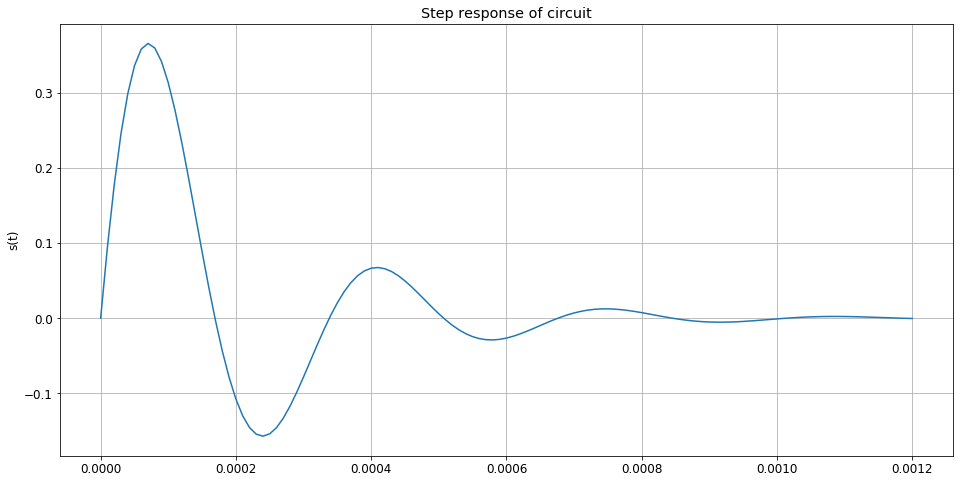

In [20]:
R = 1000
L = 27e-3
C = 100e-9

system = ([L,0], [R*L*C, L, R])

t = np.arange(0, 1.2e-3 + stepsize, stepsize)

y1 = h(t)

(Tr,y1) = sig.step(system, T=t)


plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=0)

plt.plot(t,y1)
plt.grid(True)
plt.ylabel('s(t)')
plt.title('Step response of circuit')

plt.show()

<p>We now perform the final value theorem computation on the step response of the circuit. As noted in the equations section, the step response is:$H(s)/s$ and when we perform the final value theorem the $1/s$ from the step function will cancel out the $s$ from the final value theorem and we will simply take the limit of the transfer function as s approaches 0. The results are summarized below.<br/>
Step Response:</p>
$$ S(s) = \frac{H(s)}{s} $$
<p>Final value theorem:</p>
$$ \lim_{t\to\infty}s(t) $$
$$=\lim_{s\to 0}s S(s) $$
$$=\lim_{s\to 0}H(s) $$
$$=\lim_{s\to 0}\left(\frac{\frac{s}{RC}}{s^2+s\frac{1}{RC}+\frac{1}{LC}}\right)=0 $$
<p>This results seems to agree with the graph shown above, as time goes on, the transient portion of the function degrades until the function stabilizes around 0. This is the result of a damped oscillation. This makes sense with the circuit also, since the resistor is continually burning power, the system does not continue to oscillate.</p>

<h1>Questions</h1>
<ol>
    <li><b>Explain the results of the final value theorem from Part 2 in terms of the physical circuit components</b><br><br>When the step function is applied, there is not energy stored in the circuit, thus the inductor appears as an open circuit, the capacitor appears as a short. First, the capacitor begins charging, and then the inductor begins allowing current through. As the inductor current stabilizes, the voltage drop across the capacitor wants to decrease (as the inductor looks more like a short) and some of the capacitor voltage is then discharged into the inductor making the inductor draw more current than it should for the input, which then completely drains the capacitor and actually puts a negative charge on it. Again, as the inductor stabilizes, the capacitor voltage begins to drop, discharging through the inductor in the opposite direction, and the cycle starts over. However, the resistor is constantly burning power, meaning that the each oscillation is less intense than the previous one, so the system eventually stabilizes to 0 volt output where the inductor acts like a short, with the steady state current of $V_{in}/R$ flowing, and the capacitor acts like an open circuit with no charge applied.<br></li>
</ol>
<h1>Conclusion</h1>
<p>In this lab, we have examined a circuit and calculated the impulse and step response of the system. We have performed the impulse calculations both by hand and using library functions and confirmed the results match, and we have examined the plot of the step response using the library function and compared that to the expected results using the final value theorem on the step response. What we found is that the 2nd order circuit will generally display some oscillation, but since it is damped, it will eventually stabilize to 0.</p>